## Text Classification Using Naive Bayes

Your task is to:
1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
2. Implement Naive Bayes on your own from scratch for text classification.
3. Compare Results of your implementation of Naive Bayes with one in Sklearn.
Note: You can resubmit till your code is not evaluated by TA.
Dataset - http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups
Comments : Your code must have proper comments for better understanding.

Score : Score will be given by the TA based on your submission.
Submission : You have to upload zipped file which has python notebook with implementation and dataset used.

Your project will be evaluated on following parameters -
-  Correctness of Code - Own Implementation Naive Bayes (Max Score 50)
-  Comparison (Max Score 10)
-  Commenting (Max Score 10)
-  Correctness of Code - Sklearn Naive Bayes (Max Score 30)



## Dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups()

# Display some information about the dataset
print(f"Number of documents: {len(newsgroups.data)}")
print(f"Number of categories: {len(newsgroups.target_names)}")
print("\nCategories:")
for category in newsgroups.target_names:
    print(category)

Number of documents: 11314
Number of categories: 20

Categories:
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import string
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
punctuationds = list(string.punctuation)

stops.update(punctuationds)
print(f"Size of stops and punctuationds : {len(stops)}")

Size of stops and punctuationds : 211


In [4]:
print(len(punctuationds))
punctuationds

32


['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [5]:
print(len(stops))
stops

211


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [6]:
# Access the keys
keys = newsgroups.keys()

# Display the keys and some information
for key in keys:
    print(f"{key}: {type(newsgroups[key])}")

data: <class 'list'>
filenames: <class 'numpy.ndarray'>
target_names: <class 'list'>
target: <class 'numpy.ndarray'>
DESCR: <class 'str'>


In [7]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_documents = newsgroups.data
#all_documents contains all the "X" data in un-tokenized form.

all_categories = newsgroups.target
#all_cateories contain all the "Y" data.

all_documents_modified=[word_tokenize(doc) for doc in all_documents]
#i have modified the all_documents to a form in which we have list of list of words(tokenized data for each document)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
print(len(all_documents))
print(len(all_categories))
print(len(all_documents_modified))

11314
11314
11314


In [9]:
from sklearn.model_selection import train_test_split

#splitting these documents in train and test data.
x_train, x_test, y_train, y_test=train_test_split(all_documents_modified, all_categories, random_state=1)

In [10]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8485
2829
8485
2829


In [11]:
all_words=[]
#this variable is going to contain all the words from all our tokenized documents.
for doc in x_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            #I dont't want to include words with length 1 and 2 in my vocabulary because these words are pretty much useless.
            # and they might either be the stops which are not there in "stops" variable or some punctuation marks which are
            # not there in "punctuations" variable. apart from the words of length 1 and 2 i have also removed some words
            # separately because these words are most probably present in all the documents so they are not helping us much in
            # classification.
            all_words.append(word)

In [12]:
len(all_words)
#lets check out the length of our vocabulary

1385684

## Making Dictionary of words with their corresponding frequency

In [13]:
#This function accepts a list and returns a dictionary in which keys are the perticular words in the list and values are
# the frequency of that element in that list.
def freq_dict(all_words):
    dic=dict()
    #it iterates through all the elements in the list and increases the frequency by one if it encounters the same element again.
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=freq_dict(all_words)
#Now in the "dic" variable we have the frequencies of all the elements of the list "all words".

In [19]:
# Print keys and values of the dictionary
dic

{'clay': 4,
 'rsd.dl.nec.com': 1,
 'Clay': 10,
 'Finley': 5,
 'Subject': 8822,
 'Carrying': 10,
 'Arms': 28,
 'Nntp-Posting-Host': 1867,
 'rsd21.rsd.dl.nec.com': 1,
 'Organization': 8210,
 'NEC': 148,
 'America': 292,
 'Radio': 128,
 'Software': 372,
 'Dept': 413,
 'Distribution': 1902,
 'usa': 558,
 'Lines': 8521,
 'article': 4982,
 '1993Apr5.220457.6800': 2,
 'spdc.ti.com': 3,
 'dwhite': 2,
 'epcot.spdc.ti.com': 3,
 'Dan': 219,
 'White': 231,
 'writes': 5818,
 'However': 626,
 'already': 653,
 'lost': 270,
 'right': 1895,
 'bear': 161,
 'arms': 238,
 'seems': 886,
 'states': 256,
 'like': 4131,
 'Texas': 343,
 'citizen': 75,
 'may': 2166,
 'gun': 543,
 'carry': 261,
 'home': 543,
 'business': 328,
 'severely': 23,
 'restricted': 41,
 'bearing': 28,
 'outside': 270,
 'areas': 195,
 'car': 882,
 'except': 350,
 'traveling': 18,
 'usually': 401,
 'defined': 147,
 'across': 205,
 'county': 14,
 'line': 811,
 'come': 1024,
 'court': 229,
 'rulings': 7,
 'legality': 16,
 'restricting': 16,

In [14]:
import numpy as np
#I have imported numpy because my plan is to get the elements in dic.keys() and dic.values() to two separate variables
# namely "freq" and "words". and then i will arrange them in a decreasing fashion of frequency.
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

In [15]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]
#now i have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have
# reversed the so obtained array to get a descending ordered array.

## Frequency Distribution of words

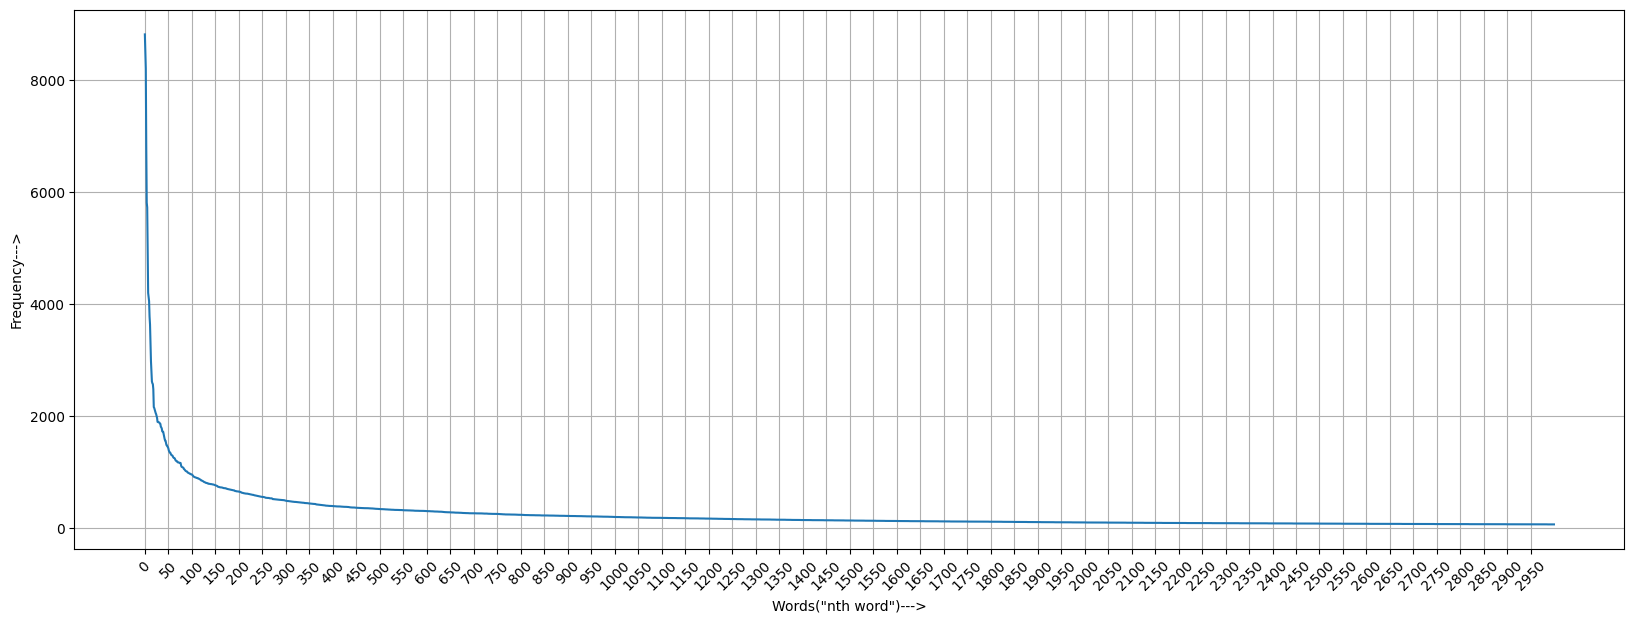

In [20]:
import matplotlib.pyplot as plt

lower_limit=0
upper_limit=3000
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
plt.figure(figsize=(20, 7))

plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45) #adjusting the xticks
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [21]:
features=words[20:4000]
#features variable contains all the top words which are most frequently used in all our documents.
freq[20], freq[3999]
# since there are 11314 documents I don't want the very high frequency words to get into my final features list as
# they may be present in all the documents which will not help me much for classiication.
# so i have choosen the words having frequency freq[20] to freq[2999]

(2150, 52)

In [22]:
# This function is the backbone of our Text Classification.
# It takes the patameters x_train or x_test and the list of all features and converts it into a TEXT-CLASSIFICATION-FRIENDLY structure.
# By text-classification-friendly, I mean it converts the data into a 2-D array which contains the frequency of that feature
# in that perticular document. where rows are the documents and columns are the features.
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    #modified_data currently have a ZEROS numpy array whose shape is (len(x_data), len(features))
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        for word in current_doc:
            #looping over each word in the current document
            if word in features:
                #whenever I am finding a perticular word in the features list...
                for j in range(len(features)):
                    #I am increasing the value of modified[i][j] to the number of times that word is present in the features list.
                    if features[j]==word:
                        modified_data[i][j]+=1
    #finally I have returned the modified array.
    return modified_data
#this function takes some time to process because i have considered nearly 3000 features and apart from that we have so many
#documents which contains so many words. so the algorithm has to go through each word in features list for each word in a perticular
#document. and this needs to be done because I think there is probably no other way to create such a modified array from x_data.

In [23]:
x_train_modified = data_modifier(x_train, features)
#training and testing data has to be modified saparately because we cant use the testing data for training purpose
#as both the Training and testing data must be having their own separate vocabularies.

In [24]:
x_test_modified= data_modifier(x_test, features)
#modified testing data

## 1) inbuilt Multinomial Naive Bayes classifier

In [28]:
#first trying out the inbuilt Multinomial naive bayes classifier.
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()
clf.fit(x_train_modified, y_train)
print("Score on training data:",clf.score(x_train_modified,y_train))
print("Score on testing data:",clf.score(x_test_modified,y_test))
#it seems like a descent score to me beacause we haven't used real text classification algorithms like NLP and all.

Score on training data: 0.8997053624042428
Score on testing data: 0.8214916931778014


In [29]:
from sklearn.metrics import confusion_matrix

y_pred=clf.predict(x_test_modified)
print(confusion_matrix(y_test,y_pred))

[[ 92   0   0   0   0   0   0   0   1   0   0   0   0   2   0   5   1   0
    1  12]
 [  0 111   5  12   7   6   2   1   2   0   0   1   2   1   1   0   0   0
    0   1]
 [  0  15  96  13   4   8   2   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   5   2 113  14   2   5   2   2   0   0   1   5   1   0   0   0   0
    0   0]
 [  0   3   0   9 110   0   9   2   2   0   1   0   0   1   0   0   0   0
    1   0]
 [  0  26   0   5   2 115   1   1   1   0   0   0   1   1   0   0   0   0
    0   0]
 [  1   1   0   6   1   0 119   4   2   1   1   0   5   2   1   0   0   1
    2   0]
 [  0   1   0   1   0   0   6 114   8   1   0   0   4   1   1   0   0   0
    0   0]
 [  1   0   1   0   0   0   4   8 115   0   0   0   0   0   0   0   2   0
    0   0]
 [  0   2   0   1   0   0   0   1   0 130   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   2   3   1   3 124   0   0   0   0   0   0   0
    0   1]
 [  0   2   0   0   0   0   1   0   1   0   0 133   0   1   2   0

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       114
           1       0.59      0.73      0.65       152
           2       0.92      0.69      0.79       139
           3       0.66      0.74      0.70       152
           4       0.71      0.80      0.75       138
           5       0.86      0.75      0.80       153
           6       0.73      0.81      0.77       147
           7       0.77      0.83      0.80       137
           8       0.80      0.88      0.84       131
           9       0.90      0.96      0.93       135
          10       0.97      0.91      0.94       136
          11       0.95      0.92      0.93       145
          12       0.84      0.68      0.75       157
          13       0.89      0.90      0.90       151
          14       0.93      0.88      0.90       155
          15       0.91      0.87      0.89       159
          16       0.83      0.91      0.87       140
          17       0.95    

## 2) Self Implementation of Naive Baye's

In [38]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count



#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out
#predict function given below.
#This "Predict" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)



#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class




#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred

In [34]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [40]:
dictionary = fit(x_train_modified, y_train)
y_predicted = predict(x_test_modified, dictionary)

In [37]:
print("Score on testing_data:",score(y_test,y_pred))

Score on testing_data: 0.8214916931778014


In [44]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix for our own naive bayes classifier.
#here i am manually printing the confusion matrix for a more clear view.
for i in confusion_matrix(y_true=y_test, y_pred=y_predicted):
    for j in i:
        print(j, end="    ")
    print()

90    0    0    0    0    0    0    0    1    0    0    0    0    1    0    10    1    0    0    11    
0    119    5    14    3    5    1    1    1    0    0    1    1    0    0    0    0    0    0    1    
0    12    100    16    2    7    0    1    1    0    0    0    0    0    0    0    0    0    0    0    
0    10    2    123    7    1    4    4    0    0    0    1    0    0    0    0    0    0    0    0    
1    6    0    15    108    0    5    2    0    0    0    0    0    1    0    0    0    0    0    0    
0    22    4    8    2    112    0    2    2    0    0    0    1    0    0    0    0    0    0    0    
1    5    0    11    2    0    108    7    2    3    0    1    2    2    0    0    0    1    2    0    
0    2    0    2    0    0    5    117    6    1    0    0    3    1    0    0    0    0    0    0    
1    0    1    0    0    0    2    11    112    0    0    0    1    0    0    0    3    0    0    0    
0    1    0    3    0    0    0    2    0    127    0    0    0 

In [45]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       114
           1       0.56      0.78      0.65       152
           2       0.88      0.72      0.79       139
           3       0.55      0.81      0.66       152
           4       0.78      0.78      0.78       138
           5       0.88      0.73      0.80       153
           6       0.82      0.73      0.77       147
           7       0.70      0.85      0.77       137
           8       0.83      0.85      0.84       131
           9       0.80      0.94      0.87       135
          10       1.00      0.81      0.89       136
          11       0.94      0.95      0.95       145
          12       0.91      0.61      0.73       157
          13       0.92      0.86      0.89       151
          14       0.96      0.78      0.86       155
          15       0.81      0.92      0.86       159
          16       0.83      0.89      0.86       140
          17       0.97    

# RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.82 on testing_data,whereas self implemented classifier gave 0.82 on testing data,which is very close.